In [1]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data
data = pd.read_csv("final data.csv")

In [3]:
data.head()

,date,date.1,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,...,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,moonPhase,total
0,2015-06-15,2015-06-15,9.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,1.0,1.0,12.0,8.0,16.0,6.0,4.0,9.0,0.97,249
1,2015-06-16,2015-06-16,10.0,NaN,NaN,1.0,4.0,NaN,2.0,NaN,...,NaN,NaN,14.0,5.0,13.0,7.0,11.0,12.0,0.02,258
2,2015-06-17,2015-06-17,5.0,NaN,NaN,1.0,5.0,3.0,NaN,NaN,...,NaN,NaN,12.0,4.0,12.0,8.0,5.0,7.0,0.04,234
3,2015-06-18,2015-06-18,6.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,...,10.0,NaN,13.0,8.0,13.0,4.0,6.0,16.0,0.07,294
4,2015-06-19,2015-06-19,9.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,...,1.0,1.0,15.0,7.0,3.0,10.0,5.0,7.0,0.11,289


# 1. Is there a correlation between moon phase and overall crime rate?

              total  moonPhase
total      1.000000   0.005254
moonPhase  0.005254   1.000000


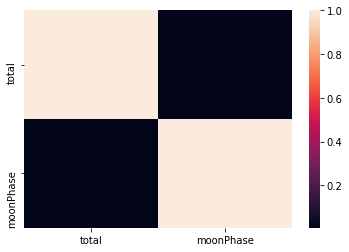

In [4]:
# calculate the correlation matrix
corr = data[['total','moonPhase']].corr()
print(corr)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Yes. There is correlation between overall crime rate and moon phase.

# 2. Does moon phase correlate to a particular type of crime?


In [12]:
# calculate the correlation matrix
corr = data[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests','moonPhase']].corr()



Aggravated Assault                           0.014991
Aircraft                                     0.056293
Arson                                       -0.090122
Assembly or Gathering Violations             0.015626
Auto Theft                                  -0.032664
Auto Theft Recovery                          0.011023
Ballistics                                  -0.008632
Biological Threat                                 NaN
Bomb Hoax                                   -0.105726
Burglary - No Property Taken                -1.000000
Commercial Burglary                          0.036383
Confidence Games                             0.019223
Counterfeiting                              -0.011995
Criminal Harassment                         -0.087611
Disorderly Conduct                          -0.023574
Drug Violation                              -0.024702
Embezzlement                                -0.109317
Evading Fare                                 0.053126
Explosives                  

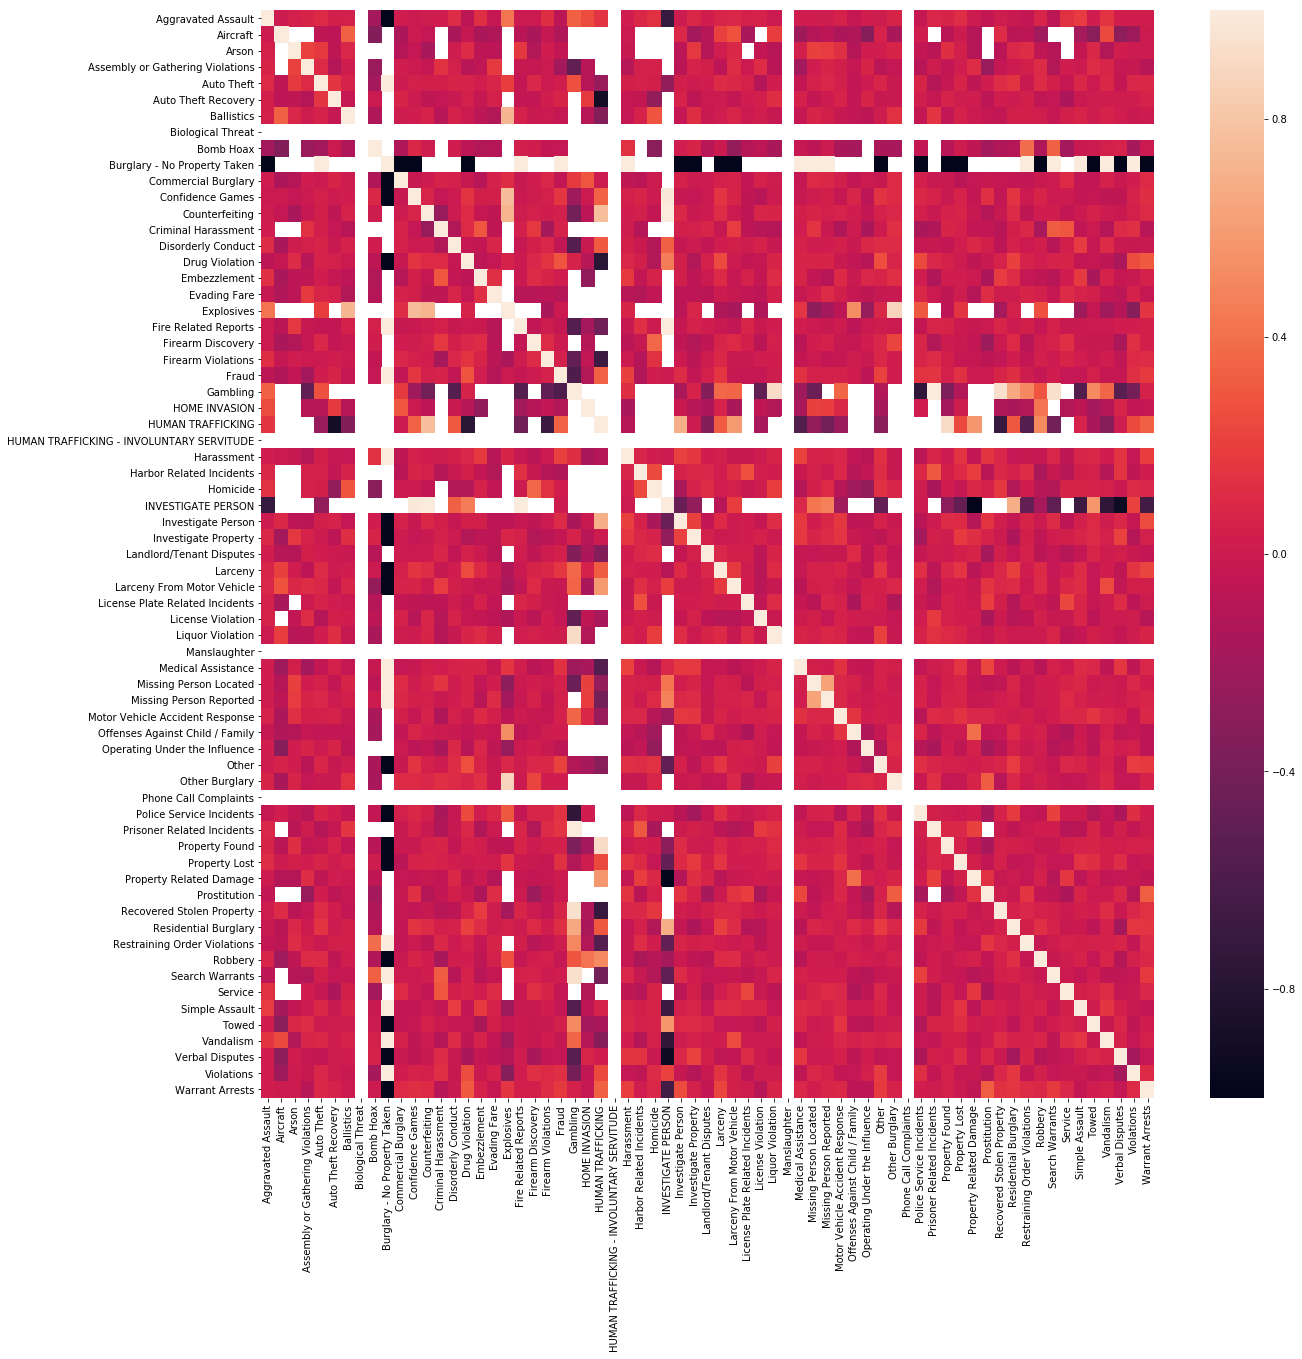

In [9]:
fig = plt.figure(figsize=(20,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [187]:
pd.DataFrame(corr['moonPhase'].sort_values(ascending=False)[1:10])

,moonPhase
HUMAN TRAFFICKING,0.602498
Homicide,0.155198
Prostitution,0.098264
Service,0.075560
Vandalism,0.072885
Fire Related Reports,0.070944
Prisoner Related Incidents,0.070012
Verbal Disputes,0.058132
Aircraft,0.056293


# 3. Which types of crimes are committed most during a full moon?


In [17]:
data['moonPhase'].describe()

count    1309.000000
mean        0.494171
std         0.289081
min         0.000000
25%         0.240000
50%         0.490000
75%         0.740000
max         0.990000
Name: moonPhase, dtype: float64

In [114]:
fm = data[data.moonPhase >= 0.98]

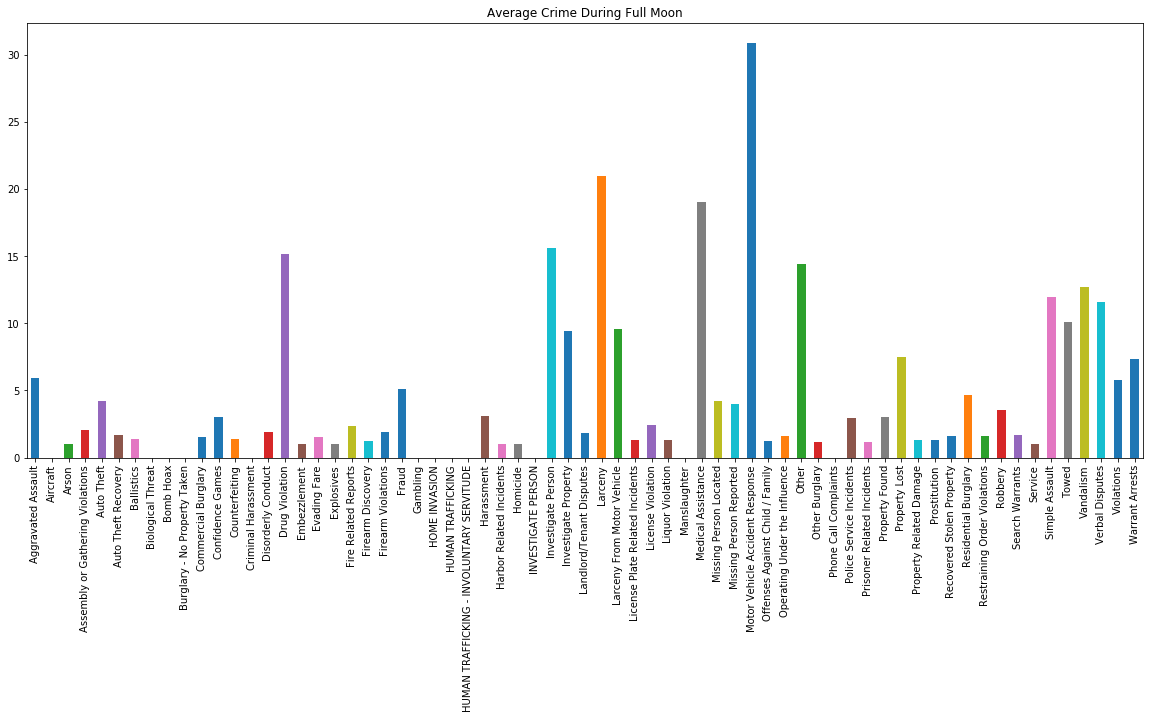

In [115]:
fig = plt.figure(figsize=(20,8))
fm[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']].mean().plot(ax = plt.gca(), kind = 'bar',title = "Average Crime During Full Moon")

In [159]:
dfm = fm[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']].mean()


In [190]:
pd.DataFrame(dfm.sort_values(ascending=False)[0:10])

,0
Motor Vehicle Accident Response,30.840
Larceny,21.000
Medical Assistance,19.000
Investigate Person,15.600
Drug Violation,15.120
Other,14.400
Vandalism,12.720
Simple Assault,11.960
Verbal Disputes,11.600
Towed,10.125


Top 10 crimes commted during full moon

# 4. Which types of crimes are committed most during a new moon?

In [116]:
nm = data[data.moonPhase == 0]

In [117]:
nm = pd.DataFrame(nm)

In [118]:
nm

,date,date.1,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,...,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,moonPhase,total
622,2017-02-26,2017-02-26,9.0,1.0,NaN,1.0,7.0,1.0,1.0,NaN,...,NaN,NaN,7.0,14.0,14.0,14.0,4.0,5.0,0.0,242
798,2017-08-21,2017-08-21,6.0,NaN,1.0,NaN,6.0,2.0,2.0,NaN,...,NaN,NaN,16.0,16.0,11.0,19.0,4.0,8.0,0.0,285


In [ ]:
nm = data[data.moonPhase == 0]

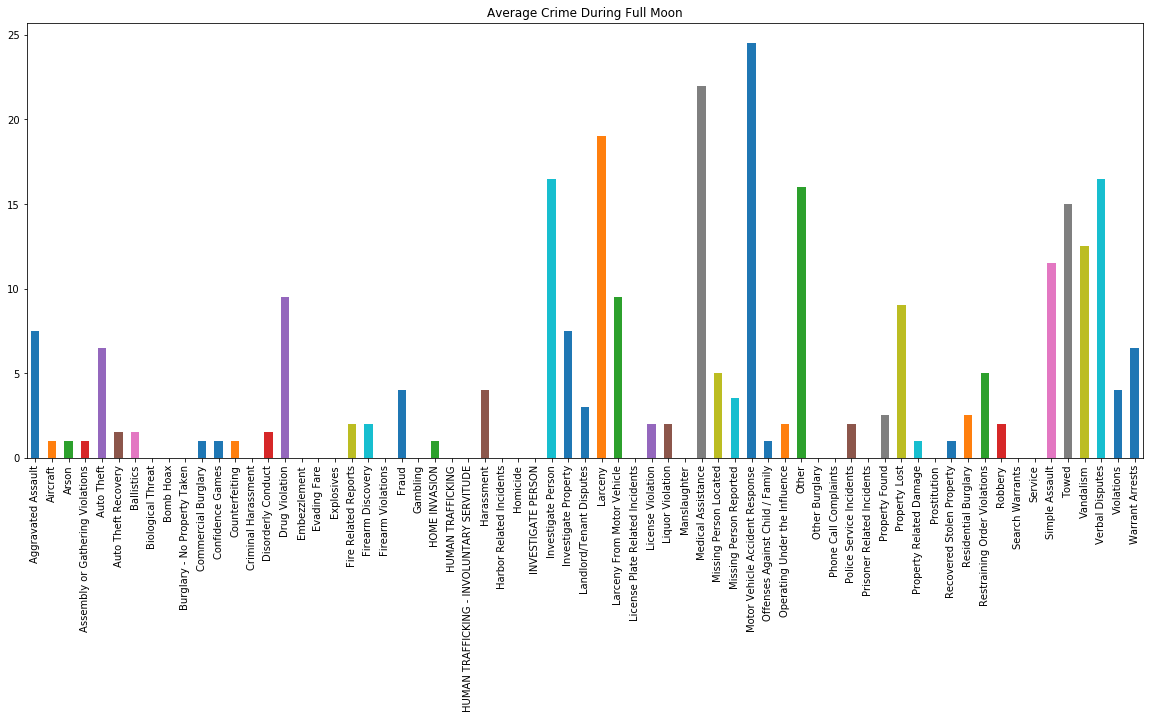

In [167]:
fig = plt.figure(figsize=(20,8))
nm[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']].mean().plot(ax = plt.gca(), kind = 'bar',title = "Average Crime During Full Moon")

In [172]:
nmd = nm[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']].mean()

In [192]:
pd.DataFrame(nmd.sort_values(ascending=False)[0:10])

,0
Motor Vehicle Accident Response,24.5
Medical Assistance,22.0
Larceny,19.0
Verbal Disputes,16.5
Investigate Person,16.5
Other,16.0
Towed,15.0
Vandalism,12.5
Simple Assault,11.5
Drug Violation,9.5


Above crimes are committed during full moon most

# 5 Is there  crime difference during Full Moon and new moon?

In [140]:
td = pd.merge(fm,nm, on = 'date')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [141]:
nm.index = nm.date

In [142]:
fm.head()

,date,date.1,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,...,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,moonPhase,total
30,2015-07-15,2015-07-15,6.0,NaN,NaN,2.0,5.0,NaN,2.0,NaN,...,2.0,1.0,13.0,NaN,8.0,10.0,6.0,11.0,0.98,292
89,2015-09-12,2015-09-12,10.0,NaN,NaN,7.0,6.0,1.0,NaN,NaN,...,1.0,NaN,16.0,18.0,11.0,2.0,16.0,2.0,0.98,305
119,2015-10-12,2015-10-12,6.0,NaN,NaN,2.0,4.0,2.0,1.0,NaN,...,NaN,NaN,9.0,13.0,13.0,10.0,8.0,5.0,0.99,232
208,2016-01-09,2016-01-09,6.0,NaN,NaN,NaN,5.0,1.0,2.0,NaN,...,1.0,NaN,10.0,11.0,10.0,9.0,3.0,3.0,0.98,228
238,2016-02-08,2016-02-08,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,1.0,NaN,8.0,3.0,9.0,9.0,5.0,5.0,0.99,166


In [143]:
nm.head()

,date,date.1,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,...,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,moonPhase,total
date,,,,,,,,,,,,,,,,,,,,,
2017-02-26,2017-02-26,2017-02-26,9.0,1.0,NaN,1.0,7.0,1.0,1.0,NaN,...,NaN,NaN,7.0,14.0,14.0,14.0,4.0,5.0,0.0,242
2017-08-21,2017-08-21,2017-08-21,6.0,NaN,1.0,NaN,6.0,2.0,2.0,NaN,...,NaN,NaN,16.0,16.0,11.0,19.0,4.0,8.0,0.0,285


In [144]:
moondata = pd.concat([nm,fm])

In [151]:
# Sort the data 
moondata = moondata.sort_values('date')

In [152]:
moondata.index = pd.to_datetime(moondata.date)

In [153]:
moondata.total = moondata.total*100/moondata.total.sum()

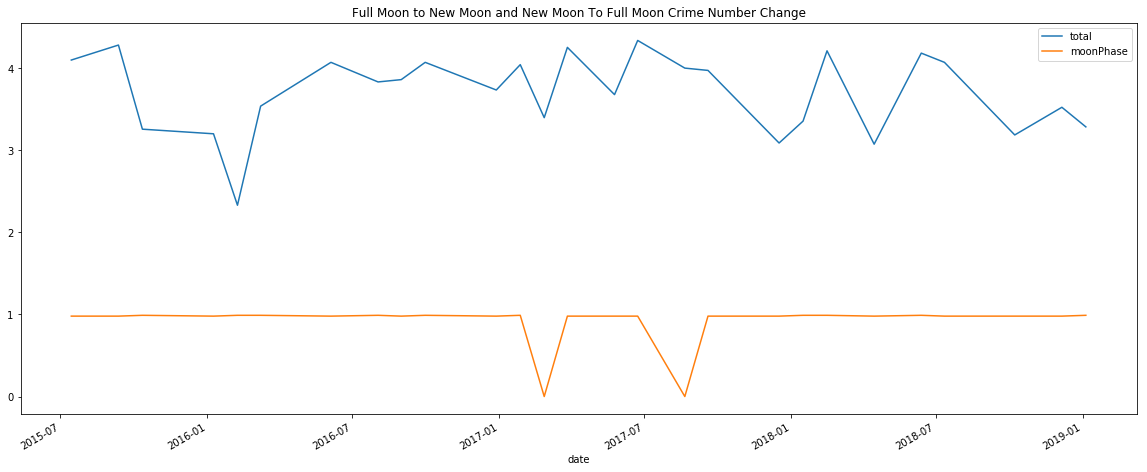

In [154]:
fig = plt.figure(figsize=(20,8))
moondata[['total','moonPhase']].plot(title = 'Full Moon to New Moon and New Moon To Full Moon Crime Number Change',ax = plt.gca())